# Install TODS

In [1]:
import warnings
warnings.filterwarnings("ignore")

!pip install -e git+https://github.com/datamllab/tods.git@dev#egg=tods 

Obtaining tods from git+https://github.com/datamllab/tods.git@dev#egg=tods
  Updating ./src/tods clone (to revision dev)
  Running command git fetch -q --tags
  Running command git reset --hard -q feb0c9c48b750c1dc4b9d60b5884b93d7824e77b
  Preparing metadata (setup.py) ... done
  Attempting uninstall: tods
    Found existing installation: tods 0.0.2
    Uninstalling tods-0.0.2:
      Successfully uninstalled tods-0.0.2
  DEPRECATION: Legacy editable install of tods from git+https://github.com/datamllab/tods.git@dev#egg=tods (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for tods


In [1]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_covtype
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.io import arff
import sklearn as sk
import time
from sklearn.datasets import fetch_openml

from tods.sk_interface.detection_algorithm.OCSVM_skinterface import OCSVMSKI
from tods.sk_interface.detection_algorithm.KNN_skinterface import KNNSKI

2024-09-27 09:52:14.818070: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-27 09:52:14.818108: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('./Data/multivariate/Occupancy/room-occupancy-0.test.csv')
df.drop(["timestamp"], axis = 1, inplace = True)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,is_anomaly
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
print(df.columns[:-1]) #feature_names

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')


In [4]:
def remove_files_from_directory(directory):
    # Get all files in the directory
    files = glob.glob(os.path.join(directory, "*"))
    
    # Loop through the files and remove each one
    for file in files:
        if os.path.isfile(file):
            os.remove(file)
    
    print(f"All files in {directory} have been removed.")

In [5]:
feature_folder = 'features'
remove_files_from_directory(feature_folder)
os.makedirs(feature_folder, exist_ok=True)

All files in features have been removed.


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Further split X_train and y_train into 7 subsets
num_sets = 7
X_train_sets = np.array_split(X_train, num_sets)
y_train_sets = np.array_split(y_train, num_sets)
# Displaying the shapes of the resulting subsets
for i in range(num_sets):
    print(f"Set {i + 1}:")
    print(f"X_train_set shape: {X_train_sets[i].shape}, y_train_set shape: {y_train_sets[i].shape}")
    print("=" * 40)

(2132, 5) (533, 5) (2132,) (533,)
Set 1:
X_train_set shape: (305, 5), y_train_set shape: (305,)
Set 2:
X_train_set shape: (305, 5), y_train_set shape: (305,)
Set 3:
X_train_set shape: (305, 5), y_train_set shape: (305,)
Set 4:
X_train_set shape: (305, 5), y_train_set shape: (305,)
Set 5:
X_train_set shape: (304, 5), y_train_set shape: (304,)
Set 6:
X_train_set shape: (304, 5), y_train_set shape: (304,)
Set 7:
X_train_set shape: (304, 5), y_train_set shape: (304,)


importances [0.03853133 0.0126778  0.89686628 0.03828299 0.0136416 ] 0
important_features ['Light', 'Temperature', 'CO2', 'HumidityRatio', 'Humidity']
X_train_class [[5.85200000e+02 2.37000000e+01 7.49200000e+02 4.76416302e-03
  2.62720000e+01]
 [5.78400000e+02 2.37180000e+01 7.60400000e+02 4.77266099e-03
  2.62900000e+01]
 [5.72666667e+02 2.37300000e+01 7.69666667e+02 4.76515255e-03
  2.62300000e+01]
 ...
 [0.00000000e+00 2.13566667e+01 6.00000000e+02 3.76866510e-03
  2.40000000e+01]
 [0.00000000e+00 2.13900000e+01 5.96500000e+02 3.77206600e-03
  2.39725000e+01]
 [0.00000000e+00 2.13150000e+01 5.97500000e+02 3.74165963e-03
  2.38900000e+01]]
Shape of X_train_class: (305, 5)
y_train_class 0      1
1      1
2      1
3      1
4      1
      ..
300    0
301    0
302    0
303    0
304    0
Name: is_anomaly, Length: 305, dtype: int64
0 importance list:
0 
                importance
Features                 
Light            0.896866
Temperature      0.038531
CO2              0.038283
Humidi

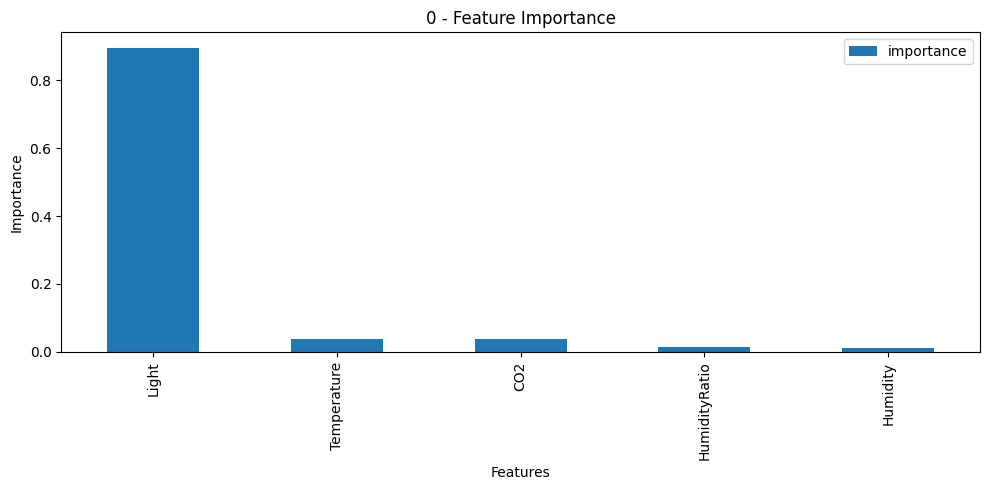

-----------------------------------------------------------------------------------------------




importances [0. 0. 0. 0. 0.] 1
important_features ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
X_train_class [[2.12900000e+01 2.39450000e+01 0.00000000e+00 5.94000000e+02
  3.74454576e-03]
 [2.12900000e+01 2.39725000e+01 0.00000000e+00 5.90500000e+02
  3.74887216e-03]
 [2.12900000e+01 2.38900000e+01 0.00000000e+00 5.86666667e+02
  3.73589314e-03]
 ...
 [2.06000000e+01 2.22000000e+01 0.00000000e+00 4.49000000e+02
  3.32520581e-03]
 [2.06000000e+01 2.22600000e+01 0.00000000e+00 4.49333333e+02
  3.33424103e-03]
 [2.06000000e+01 2.22000000e+01 0.00000000e+00 4.46250000e+02
  3.32520581e-03]]
Shape of X_train_class: (305, 5)
y_train_class 305    0
306    0
307    0
308    0
309    0
      ..
605    0
606    0
607    0
608    0
609    0
Name: is_anomaly, Length: 305, dtype: int64
1 importance list:
1 
                importance
Features                 
Temperature           0.

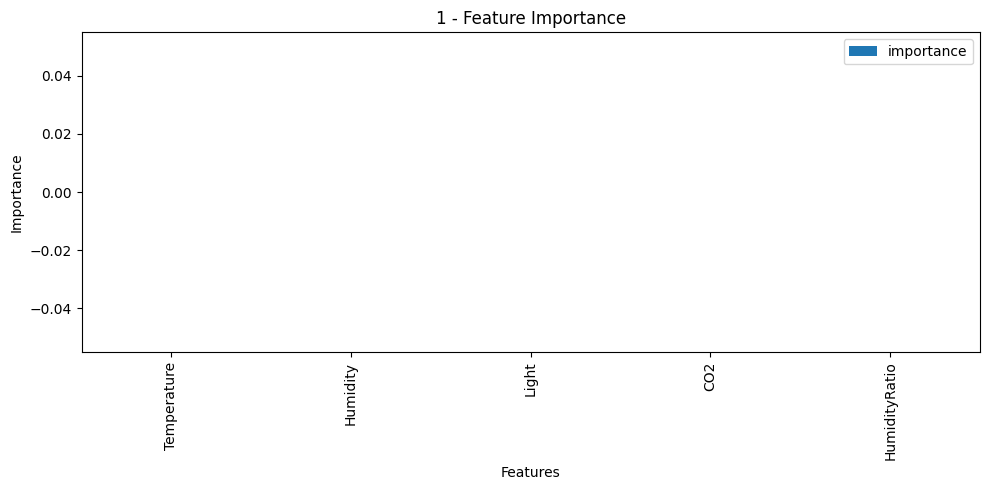

-----------------------------------------------------------------------------------------------




importances [0. 0. 0. 0. 0.] 2
important_features ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
X_train_class [[2.06000000e+01 2.22000000e+01 0.00000000e+00 4.46600000e+02
  3.32520581e-03]
 [2.06000000e+01 2.22000000e+01 0.00000000e+00 4.47666667e+02
  3.32520581e-03]
 [2.06000000e+01 2.22000000e+01 0.00000000e+00 4.47000000e+02
  3.32520581e-03]
 ...
 [2.03233333e+01 2.26000000e+01 0.00000000e+00 4.36000000e+02
  3.32781665e-03]
 [2.02900000e+01 2.26000000e+01 0.00000000e+00 4.35200000e+02
  3.32093209e-03]
 [2.03233333e+01 2.26000000e+01 0.00000000e+00 4.33666667e+02
  3.32781665e-03]]
Shape of X_train_class: (305, 5)
y_train_class 610    0
611    0
612    0
613    0
614    0
      ..
910    0
911    0
912    0
913    0
914    0
Name: is_anomaly, Length: 305, dtype: int64
2 importance list:
2 
                importance
Features                 
Temperature           0.

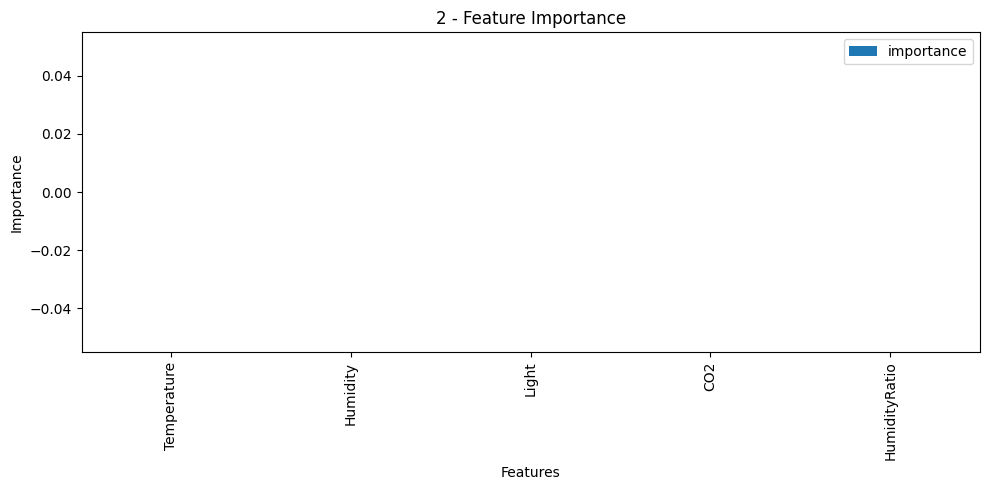

-----------------------------------------------------------------------------------------------




importances [0.00717758 0.02314036 0.3606791  0.44133225 0.16767072] 3
important_features ['CO2', 'Light', 'HumidityRatio', 'Humidity', 'Temperature']
X_train_class [[4.34250000e+02 0.00000000e+00 3.32093209e-03 2.26000000e+01
  2.02900000e+01]
 [4.40500000e+02 0.00000000e+00 3.32462533e-03 2.26250000e+01
  2.02900000e+01]
 [4.40666667e+02 0.00000000e+00 3.32585641e-03 2.26333333e+01
  2.02900000e+01]
 ...
 [1.12350000e+03 4.99000000e+02 4.54068480e-03 2.81250000e+01
  2.17900000e+01]
 [1.12780000e+03 4.90600000e+02 4.54605148e-03 2.81580000e+01
  2.17900000e+01]
 [1.14866667e+03 5.02000000e+02 4.56263996e-03 2.82600000e+01
  2.17900000e+01]]
Shape of X_train_class: (305, 5)
y_train_class 915     0
916     0
917     0
918     0
919     0
       ..
1215    1
1216    1
1217    1
1218    1
1219    1
Name: is_anomaly, Length: 305, dtype: int64
3 importance list:
3 
                importance

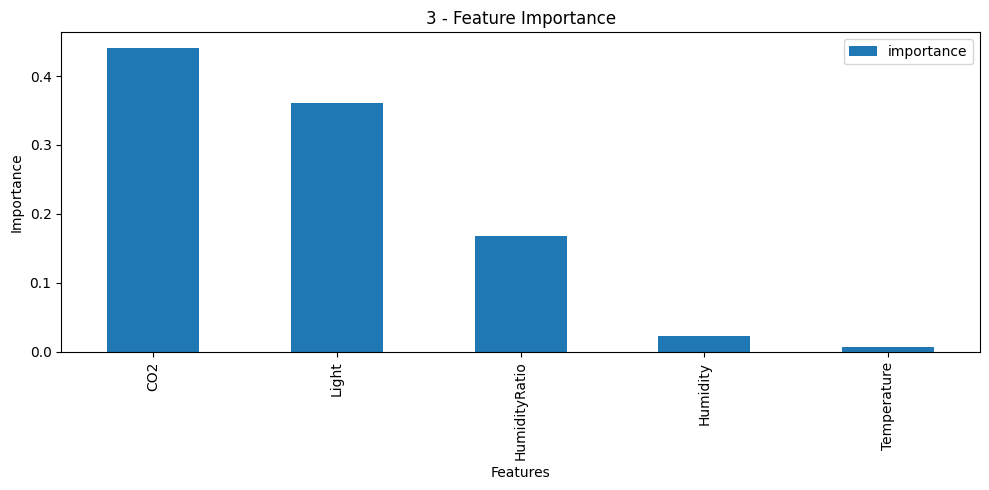

-----------------------------------------------------------------------------------------------




importances [0.01033002 0.0563973  0.74823253 0.09533796 0.08970218] 4
important_features ['Light', 'CO2', 'HumidityRatio', 'Humidity', 'Temperature']
X_train_class [[4.93000000e+02 1.15150000e+03 4.55059766e-03 2.81000000e+01
  2.18400000e+01]
 [4.93000000e+02 1.14233333e+03 4.55136598e-03 2.81333333e+01
  2.18233333e+01]
 [4.93000000e+02 1.14200000e+03 4.58384551e-03 2.82520000e+01
  2.18700000e+01]
 ...
 [4.54000000e+02 1.34000000e+03 5.30244234e-03 3.06800000e+01
  2.28900000e+01]
 [4.54000000e+02 1.35075000e+03 5.32378528e-03 3.07000000e+01
  2.29450000e+01]
 [4.54000000e+02 1.35600000e+03 5.30157083e-03 3.06750000e+01
  2.28900000e+01]]
Shape of X_train_class: (304, 5)
y_train_class 1220    1
1221    1
1222    1
1223    1
1224    1
       ..
1519    1
1520    1
1521    1
1522    1
1523    1
Name: is_anomaly, Length: 304, dtype: int64
4 importance list:
4 
                importance

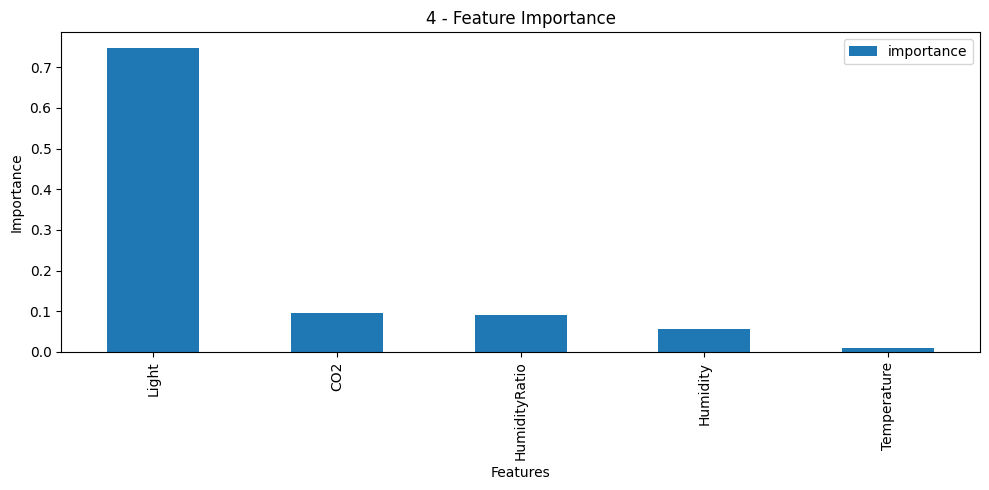

-----------------------------------------------------------------------------------------------




importances [0.104 0.    0.624 0.176 0.096] 5
important_features ['Light', 'CO2', 'Temperature', 'HumidityRatio', 'Humidity']
X_train_class [[4.54000000e+02 1.35175000e+03 2.28900000e+01 5.30157083e-03
  3.06750000e+01]
 [4.54000000e+02 1.36016667e+03 2.28900000e+01 5.31377230e-03
  3.07450000e+01]
 [4.54000000e+02 1.36420000e+03 2.28900000e+01 5.32161636e-03
  3.07900000e+01]
 ...
 [0.00000000e+00 6.77800000e+02 2.11600000e+01 4.15891578e-03
  2.67900000e+01]
 [0.00000000e+00 6.84333333e+02 2.12000000e+01 4.16920834e-03
  2.67900000e+01]
 [0.00000000e+00 6.82500000e+02 2.11500000e+01 4.15634614e-03
  2.67900000e+01]]
Shape of X_train_class: (304, 5)
y_train_class 1524    1
1525    1
1526    1
1527    1
1528    1
       ..
1823    0
1824    0
1825    0
1826    0
1827    0
Name: is_anomaly, Length: 304, dtype: int64
5 importance list:
5 
                importance
Features                

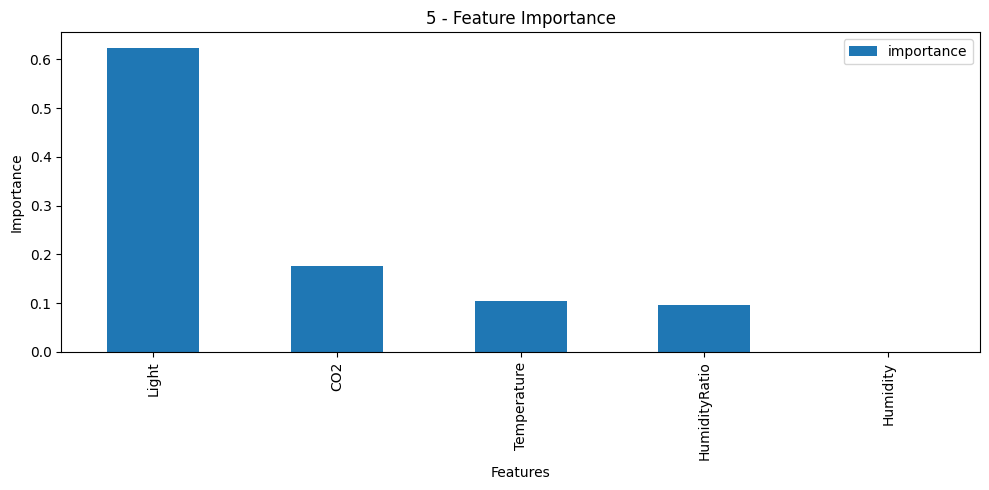

-----------------------------------------------------------------------------------------------




importances [0. 0. 0. 0. 0.] 6
important_features ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
X_train_class [[2.11750000e+01 2.67900000e+01 0.00000000e+00 6.75000000e+02
  4.16277286e-03]
 [2.11250000e+01 2.67900000e+01 0.00000000e+00 6.69250000e+02
  4.14992818e-03]
 [2.12000000e+01 2.67450000e+01 0.00000000e+00 6.68500000e+02
  4.16215833e-03]
 ...
 [2.07000000e+01 2.51000000e+01 0.00000000e+00 5.08500000e+02
  3.78560813e-03]
 [2.07000000e+01 2.51000000e+01 0.00000000e+00 5.10000000e+02
  3.78560813e-03]
 [2.07000000e+01 2.51000000e+01 0.00000000e+00 5.09666667e+02
  3.78560813e-03]]
Shape of X_train_class: (304, 5)
y_train_class 1828    0
1829    0
1830    0
1831    0
1832    0
       ..
2127    0
2128    0
2129    0
2130    0
2131    0
Name: is_anomaly, Length: 304, dtype: int64
6 importance list:
6 
                importance
Features                 
Temperature  

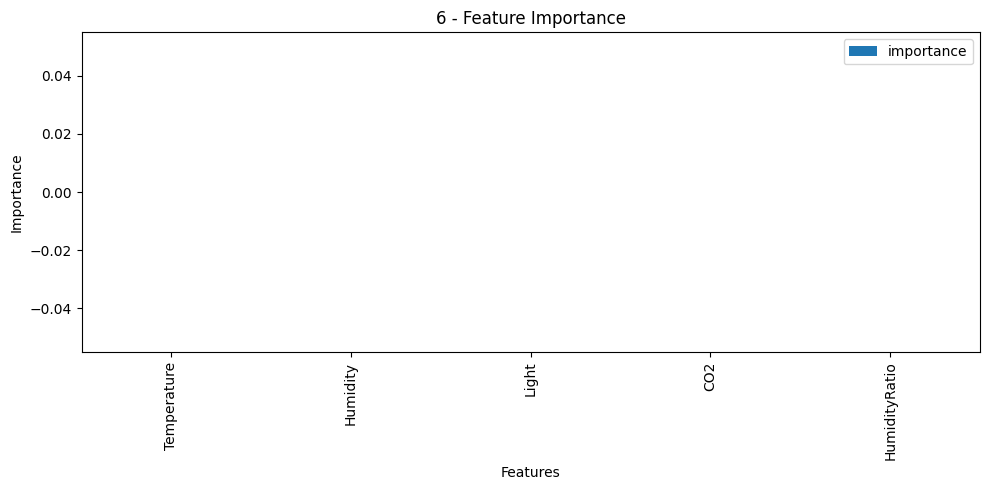

-----------------------------------------------------------------------------------------------




feature_importances {0: ['Light', 'Temperature', 'CO2', 'HumidityRatio', 'Humidity'], 1: ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], 2: ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], 3: ['CO2', 'Light', 'HumidityRatio', 'Humidity', 'Temperature'], 4: ['Light', 'CO2', 'HumidityRatio', 'Humidity', 'Temperature'], 5: ['Light', 'CO2', 'Temperature', 'HumidityRatio', 'Humidity'], 6: ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']}
mission accomplished!
Total operation time: =  2.01938796043396 seconds


In [8]:
seconds = time.time()

# Headers of column
main_labels=df.columns

ths = open("importance_list.csv", "w")
feature_importances = {}
SVMs = {}

for i, (X_set, y_set) in enumerate(zip(X_train_sets, y_train_sets)):
    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X_set, y_set)
    importances = forest.feature_importances_
    print('importances', importances, i)
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    num_features = len(importances)
    num_display = min(num_features, 20)  # Only display up to the maximum available features
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:num_display],'importance':importances[0:num_display]})
    impor_bars = impor_bars.sort_values('importance',ascending=False)
    important_features = impor_bars['Features'].to_list()[:5]
    impor_bars = impor_bars.set_index('Features')
    print('important_features', important_features)
    feature_importances[i] = important_features
    
    svm = OCSVMSKI()
    X_train_class = np.array(X_set.iloc[:, X_set.columns.get_indexer(important_features)])
    print('X_train_class', X_train_class)
    if isinstance(X_train_class, np.ndarray):
        print("Shape of X_train_class:", X_train_class.shape)
    else:
        print("X_train_class is not a numpy array.")
    y_train_class = y_set
    print('y_train_class', y_train_class)
    if len(y_train_class) > 0:  # Ensure there are samples for this class
        svm.fit(X_train_class)
    else:
        print(f'no data for {i}')
    SVMs[i] = svm
    
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=str(i)+"=["
    for j in impor_bars.index:
        fea_ture=fea_ture+"\""+str(j)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(i,"importance list:")
    print(i,"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(str(i)+" - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig(os.path.join(feature_folder, str(i)+".pdf"),bbox_inches='tight', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

print('feature_importances', feature_importances)
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")
ths.close()



In [12]:
TEST_COUNT = 100

# Step 1: Train KNN to classify
knn = KNNSKI(n_neighbors=5)
knn.fit(np.array(X_train))

# Step 2: Predict classes for the test set
knn_predictions = knn.predict(np.array(X_test[:TEST_COUNT]))
print('knn_predictions', knn_predictions)

knn_predictions [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [13]:
y_test = y_test[:TEST_COUNT]
print("KNN Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))
print("\nClassification Report:")
print(classification_report(y_test, knn_predictions))
print("Accuracy:", accuracy_score(y_test, knn_predictions))

KNN Evaluation:
Confusion Matrix:
[[100]]
[[100]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Accuracy: 1.0


In [46]:
svm_predictions = []

for i in range(TEST_COUNT):
    test_instance = X_test[i].reshape(1, -1)
    predicted_label = knn_predictions[i]
    # print('predicted_label', predicted_label)
    selected_features = feature_importances[predicted_label]
    # print('selected_features', selected_features)
    svm_model = SVMs[predicted_label]
    
    # Select features for the SVM
    dd = all_df.drop(columns=[target_column])
    # test_instance_selected = test_instance[:, dd.columns.get_indexer(selected_features)]
    # print('dd.columns.get_indexer(selected_features)', dd.columns.get_indexer(selected_features))
    test_instance_selected = pd.DataFrame(
        test_instance[:, all_df.columns.get_indexer(selected_features)], 
        columns=selected_features
    )
    # print('test_instance_selected', test_instance_selected)
    
    svm_prediction = svm_model.predict(test_instance_selected)
    print((svm_prediction, inv_cover_types[predicted_label], y_test[i]))
    svm_predictions.append((svm_prediction, inv_cover_types[predicted_label], y_test[i]))
# print(svm_predictions)

KeyError: 0

In [12]:
# Now evaluate SVM predictions only for the anomalies detected by KNN
# Create a mask for test instances that KNN classified as anomalies
anomaly_mask = knn_predictions != normal_target  # Assuming normal_target is your normal class
anomaly_mask = anomaly_mask[:TEST_COUNT]
print('anomaly_mask', len(anomaly_mask), type(anomaly_mask))

# Get true labels and predictions for anomalies
svm_predictions_actual = [t[1] for t in svm_predictions]
print('svm_predictions_actual', len(svm_predictions_actual), type(svm_predictions_actual))
svm_predictions_actual = np.array(svm_predictions_actual)
print('svm_predictions_actual', svm_predictions_actual)
y_test_anomalies = y_test[anomaly_mask]
svm_predictions_anomalies = svm_predictions_actual[anomaly_mask]

# Evaluate SVM only on the anomalies
print("\nSVM Evaluation (for anomalies):")
print("Confusion Matrix:")
print(confusion_matrix(y_test_anomalies, svm_predictions_anomalies))
print("\nClassification Report:")
print(classification_report(y_test_anomalies, svm_predictions_anomalies))
print("Accuracy:", accuracy_score(y_test_anomalies, svm_predictions_anomalies))

# Optionally, you can also compute the overall accuracy
overall_accuracy = accuracy_score(y_test, np.concatenate((svm_predictions_anomalies, knn_predictions[~anomaly_mask])))
print("\nOverall Accuracy:", overall_accuracy)

anomaly_mask 100 <class 'numpy.ndarray'>
svm_predictions_actual 100 <class 'list'>
svm_predictions_actual [1 2 2 2 2 3 2 1 2 2 2 1 5 2 2 1 2 5 3 2 1 2 2 1 6 1 1 2 1 2 1 2 2 3 2 2 2
 2 2 1 2 1 1 2 2 1 2 1 7 2 1 1 6 2 1 1 7 2 2 2 2 1 1 2 2 2 3 2 2 1 5 1 2 3
 1 3 1 1 1 2 2 1 2 2 2 1 1 3 1 2 1 1 2 1 3 3 2 2 1 1]

SVM Evaluation (for anomalies):
Confusion Matrix:
[[33  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        33
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        52
   macro avg       0.82      0.83      0.83        52


/home/brina/miniconda3/envs/aeon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/brina/miniconda3/envs/aeon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/brina/miniconda3/envs/aeon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [41]:
# for label, name in cover_types.items():
#     # Get feature importances for the current class from the Random Forest model
#     # df_class = all_df[all_df[target_column] == label]
#     # Compute feature importances as before and select top features
#     # Assuming `top_features` contains the selected feature names for the current class
#     # top_features = df_class.columns[df_class.columns.isin(impor_bars.index[:5])]  # Adjust as needed
    
#     # Train SVM using only the selected features for the current class
#     svm = SVC()
#     X_train_class = X_train[y_train == label][:, df.columns.get_indexer(feature_importance)]
#     y_train_class = y_train[y_train == label]
    
#     if len(y_train_class) > 0:  # Ensure there are samples for this class
#         svm.fit(X_train_class, y_train_class)

#     # Store the model for later use
#     feature_importance[label] = (svm, top_features)

NameError: name 'df_class' is not defined